In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [13]:
% matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [62]:
df1 = pd.read_csv("car_data.csv")
df1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [47]:
def linear_explanation_2(dependent, independent, data, var=True):
    x = data[[dependent]]
    y = data[independent]
    regres = linear_model.LinearRegression()
    regres.fit(x,y)
    if var:
        return 'Percent of the Variance explained: {}%'.format(round(regres.score(x,y) * 100, 2))
    else:
        return (plt.scatter(x, y, color='c',label=(dependent, independent)), plt.plot(x, regres.predict(x)))

linear_explanation_2('Mileage', 'Price', df)

'Percent of the Variance explained: 2.05%'

'Percent of the Variance explained: 2.05%'

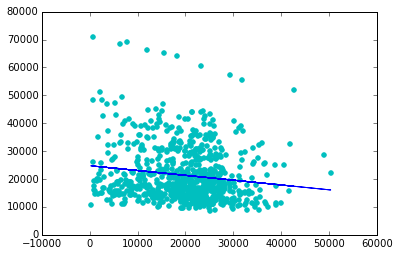

In [48]:

linear_explanation_2('Mileage', 'Price', df, var=False)
linear_explanation_2('Mileage', 'Price', df)

Linear Regression doesn't seem able to make the data much clearer. We might want to think of another way of approaching this data.

In [76]:
mileage = df[['Mileage', 'Cylinder']]
cylinders = df[['Cylinder']]
liters = df[['Liter']]
doors = df[['Doors']]
cruise = df[['Cruise']]
sound = df[['Sound']]
leather = df[['Leather']]
price = df['Price']

In [77]:
mile_c = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
regc = linear_model.LinearRegression()
regc.fit(mileage, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
regc.score(mile_c,price)

0.34228021178720835

In [68]:
def linear_explanation(dependent, independent, data):
    x = data[dependent]
    y = data[independent]
    regres = linear_model.LinearRegression()
    regres.fit(x,y)
    return 'Percent of the Variance explained: {}%'.format(round(regres.score(x,y) * 100, 2))

In [69]:
linear_explanation(['Mileage', 'Cylinder'], 'Price', df1)

'Percent of the Variance explained: 33.98%'

In [75]:
for i in combos:
    print(linear_explanation(list(i), 'Price', df1) + ' {}'.format(i))

Percent of the Variance explained: 33.98% ('Mileage', 'Cylinder')
Percent of the Variance explained: 32.91% ('Mileage', 'Liter')
Percent of the Variance explained: 4.04% ('Mileage', 'Doors')
Percent of the Variance explained: 20.93% ('Mileage', 'Cruise')
Percent of the Variance explained: 3.69% ('Mileage', 'Sound')
Percent of the Variance explained: 4.52% ('Mileage', 'Leather')
Percent of the Variance explained: 32.59% ('Cylinder', 'Liter')
Percent of the Variance explained: 34.35% ('Cylinder', 'Doors')
Percent of the Variance explained: 38.39% ('Cylinder', 'Cruise')
Percent of the Variance explained: 32.93% ('Cylinder', 'Sound')
Percent of the Variance explained: 33.7% ('Cylinder', 'Leather')
Percent of the Variance explained: 32.05% ('Liter', 'Doors')
Percent of the Variance explained: 36.8% ('Liter', 'Cruise')
Percent of the Variance explained: 31.93% ('Liter', 'Sound')
Percent of the Variance explained: 32.34% ('Liter', 'Leather')
Percent of the Variance explained: 19.96% ('Doors',

#('Cylinder', 'Cruise') is the winner for most error resolved!

In [83]:
import itertools
dependent_vars = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
combos = list(itertools.combinations(dependent_vars, 2))


[('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')]


In [ ]:
choices = []

def regression_for(combo):
    combo = list(combo)
    df = df1.loc[:, combo + ['Life expectancy at birth, total (years)']]
    df.dropna(inplace=True)
    input_data = df[combo]
    life_expectancy = df['Life expectancy at birth, total (years)']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, life_expectancy)
    return regr, regr.score(input_data, life_expectancy)

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

In [74]:
for i in combos:
    print(linear_explanation(list(i), 'Price', df1) + ' {}'.format(i))

Percent of the Variance explained: 33.98% ('Mileage', 'Cylinder')
Percent of the Variance explained: 32.91% ('Mileage', 'Liter')
Percent of the Variance explained: 4.04% ('Mileage', 'Doors')
Percent of the Variance explained: 20.93% ('Mileage', 'Cruise')
Percent of the Variance explained: 3.69% ('Mileage', 'Sound')
Percent of the Variance explained: 4.52% ('Mileage', 'Leather')
Percent of the Variance explained: 32.59% ('Cylinder', 'Liter')
Percent of the Variance explained: 34.35% ('Cylinder', 'Doors')
Percent of the Variance explained: 38.39% ('Cylinder', 'Cruise')
Percent of the Variance explained: 32.93% ('Cylinder', 'Sound')
Percent of the Variance explained: 33.7% ('Cylinder', 'Leather')
Percent of the Variance explained: 32.05% ('Liter', 'Doors')
Percent of the Variance explained: 36.8% ('Liter', 'Cruise')
Percent of the Variance explained: 31.93% ('Liter', 'Sound')
Percent of the Variance explained: 32.34% ('Liter', 'Leather')
Percent of the Variance explained: 19.96% ('Doors',

#For fun:

In [81]:
df2 = df1[dependent_vars]

ValueError: shapes (804,7) and (2,) not aligned: 7 (dim 1) != 2 (dim 0)

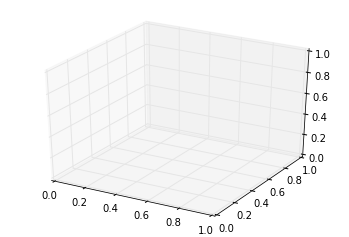

In [82]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx = df2['Cruise']
yy = df2['Cylinder']
zz = price
predict = regc.predict(df2)
x_surf, y_surf = np.meshgrid(xx, yy)
ax.plot_surface(x_surf, y_surf, predict, color="red", alpha=0.1)
ax.scatter(xx, yy, zz)